# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import date
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:

# Set base url and units variables, and combine them to get the query url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Create empty lists to store the data for each field
city_id_list = []
city_name_list = []
country_list = []
lng_list = []
lat_list = []
temp_list = []
humidity_list = []
clouds_list = []
wind_speed_list = []

# Loop through cities
for city in cities:
    response_json = requests.get(query_url + city).json()
    try:
        
        city_id = response_json['id']
        city_id_list.append(city_id)
            
        city_name = response_json['name']
        city_name_list.append(city_name)
        
        country_name = response_json['sys']['country']
        country_list.append(country_name)

        lng = response_json['coord']['lon']
        lng_list.append(lng)

        lat = response_json['coord']['lat']
        lat_list.append(lat)

        temp = response_json['main']['temp']
        temp_list.append(temp)

        humidity = response_json['main']['humidity']
        humidity_list.append(humidity)

        clouds = response_json['clouds']['all']
        clouds_list.append(clouds)

        wind_speed = response_json['wind']['speed']
        wind_speed_list.append(wind_speed)
    
        print(f"City Name: {city}, City ID: {city_id}")
    
    # Print error message and move on to the next city if there is an error
    except:
        
        print("There is no record, continue to the next record...")


City Name: avarua, City ID: 4035715
City Name: save, City ID: 2391893
City Name: bluff, City ID: 2206939
City Name: ust-omchug, City ID: 2120047
City Name: kirkwall, City ID: 2645198
City Name: puerto ayora, City ID: 3652764
City Name: hamilton, City ID: 4513583
City Name: grindavik, City ID: 3416888
There is no record, continue to the next record...
City Name: vaini, City ID: 4032243
City Name: bouca, City ID: 2387890
City Name: labuhan, City ID: 8079926
City Name: ribeira grande, City ID: 3372707
City Name: kaitangata, City ID: 2208248
City Name: tuktoyaktuk, City ID: 6170031
City Name: castro, City ID: 3466704
City Name: yerbogachen, City ID: 2012956
City Name: roald, City ID: 3141667
City Name: ketchikan, City ID: 5554428
City Name: safford, City ID: 5312476
City Name: imbituba, City ID: 3461370
City Name: grenfell, City ID: 2164457
City Name: padang, City ID: 1633419
City Name: saldanha, City ID: 3361934
City Name: ushuaia, City ID: 3833367
City Name: ban nahin, City ID: 1661950
C

City Name: hong gai, City ID: 1580410
City Name: ruteng, City ID: 1629380
City Name: monte patria, City ID: 3879429
City Name: koungheul, City ID: 2249554
City Name: borda da mata, City ID: 3469169
There is no record, continue to the next record...
City Name: cocal, City ID: 3466005
City Name: dicabisagan, City ID: 1715015
City Name: tigil, City ID: 2120612
There is no record, continue to the next record...
City Name: port elizabeth, City ID: 964420
City Name: aasiaat, City ID: 3424901
City Name: alofi, City ID: 4036284
City Name: port blair, City ID: 1259385
City Name: balangir, City ID: 1277643
City Name: roebourne, City ID: 2062276
City Name: manzhouli, City ID: 2035836
City Name: camacha, City ID: 2270385
City Name: deputatskiy, City ID: 2028164
City Name: bandarbeyla, City ID: 64814
City Name: chuy, City ID: 3443061
City Name: banda aceh, City ID: 1215502
City Name: bayevo, City ID: 1510709
City Name: zhongshu, City ID: 1784310
City Name: port augusta, City ID: 2063056
There is no

City Name: nikitinskiy, City ID: 1497736
City Name: lehigh acres, City ID: 4161785
City Name: chulman, City ID: 2025261
City Name: agua dulce, City ID: 3533269
City Name: jumla, City ID: 1283285
City Name: miramar, City ID: 4164601
City Name: quatre cocos, City ID: 1106643
City Name: esperance, City ID: 2071860
City Name: camapua, City ID: 3468020
City Name: veracruz, City ID: 3514780
City Name: saint-leu, City ID: 6690297
City Name: kasongo-lunda, City ID: 2315026
City Name: juneau, City ID: 5554072
City Name: bonfim, City ID: 3405215
City Name: usinsk, City ID: 863061
City Name: gurupa, City ID: 3398480
City Name: la libertad, City ID: 3655131
City Name: makakilo city, City ID: 5850554
City Name: severo-kurilsk, City ID: 2121385
City Name: hualmay, City ID: 3939761
City Name: abengourou, City ID: 2293549
City Name: balrampur, City ID: 1277525
City Name: lagoa, City ID: 3372964
City Name: mahibadhoo, City ID: 1337605
City Name: starokozache, City ID: 692819
City Name: pitsunda, City I

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Convert the data into a dataframe
cities_df = pd.DataFrame({"City ID": city_id_list, "City": city_name_list, "Country": country_list, "Lat": lat_list, "Lng": lng_list,
                         "Temperature": temp_list, "Humidity": humidity_list, "Clouds": clouds_list,
                         "Wind Speed": wind_speed_list})
cities_df.head()



,City ID,City,Country,Lat,Lng,Temperature,Humidity,Clouds,Wind Speed
0,4035715,Avarua,CK,-21.2078,-159.7750,82.40,78,75,5.75
1,2391893,Savé,BJ,8.0425,2.4860,79.65,74,71,5.19
2,2206939,Bluff,NZ,-46.6000,168.3333,73.00,56,53,5.99
3,2120047,Ust'-Omchug,RU,61.1500,149.6333,-13.11,93,99,4.56
4,2645198,Kirkwall,GB,58.9848,-2.9587,35.60,80,40,7.83


In [5]:
# Export to .csv file

cities_df.to_csv("../Output_data/city_weather.csv", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
cities_df.describe()


,City ID,Lat,Lng,Temperature,Humidity,Clouds,Wind Speed
count,5.500000e+02,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000
mean,2.703909e+06,19.048207,21.074540,51.995255,72.112727,52.165455,7.769618
std,1.658474e+06,33.321373,93.322267,29.571207,21.798005,39.973077,5.838001
min,6.481400e+04,-54.800000,-175.200000,-42.140000,7.000000,0.000000,0.090000
25%,1.539256e+06,-6.974400,-61.970650,35.600000,60.000000,7.000000,3.440000
50%,2.176038e+06,21.417650,25.540650,62.180000,77.000000,58.000000,6.095000
75%,3.625783e+06,47.642500,107.278425,75.160000,89.000000,91.750000,10.360000
max,8.079926e+06,78.218600,179.316700,96.800000,100.000000,100.000000,46.040000


In [7]:
#  Get the indices of cities that have humidity over 100%.

humid_city_data = cities_df[(cities_df["Humidity"] > 100)].index
                                  
humid_city_data

Int64Index([], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = cities_df.drop(humid_city_data, inplace=False)
clean_city_data.head()


,City ID,City,Country,Lat,Lng,Temperature,Humidity,Clouds,Wind Speed
0,4035715,Avarua,CK,-21.2078,-159.7750,82.40,78,75,5.75
1,2391893,Savé,BJ,8.0425,2.4860,79.65,74,71,5.19
2,2206939,Bluff,NZ,-46.6000,168.3333,73.00,56,53,5.99
3,2120047,Ust'-Omchug,RU,61.1500,149.6333,-13.11,93,99,4.56
4,2645198,Kirkwall,GB,58.9848,-2.9587,35.60,80,40,7.83


In [9]:
clean_city_data.to_csv("../Output_data/clean_city_data.csv", index=False, header=True)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

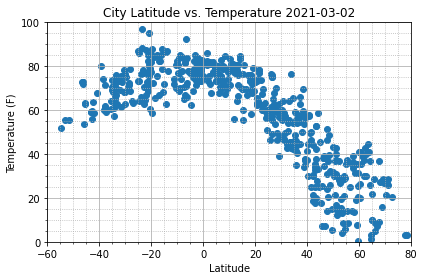

In [10]:
x_values = cities_df["Lat"]
y_values = cities_df["Temperature"]
plt.scatter(x_values,y_values)
plt.title(f'City Latitude vs. Temperature {date.today()}')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(0, 100)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.savefig("../output_data/City Latitude vs. Temperature.png")
plt.show()



## Latitude vs. Humidity Plot

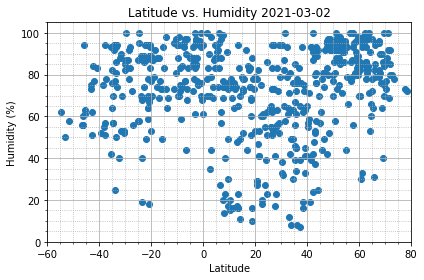

In [11]:
x_values = cities_df["Lat"]
y_values = cities_df["Humidity"]
plt.scatter(x_values,y_values)
plt.title(f'Latitude vs. Humidity {date.today()}')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.savefig("../output_data/Humidity at Latitude Positions.png")
plt.show()


## Latitude vs. Cloudiness Plot

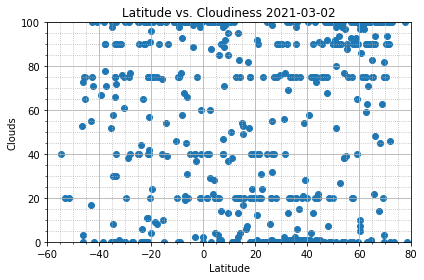

In [12]:
x_values = cities_df["Lat"]
y_values = cities_df["Clouds"]
plt.scatter(x_values,y_values)
plt.title(f'Latitude vs. Cloudiness {date.today()}')
plt.xlabel('Latitude')
plt.ylabel('Clouds')
plt.ylim(0, 100)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.savefig("../output_data/Latitude vs. Cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

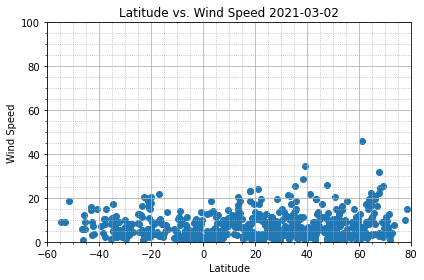

In [13]:
x_values = cities_df["Lat"]
y_values = cities_df["Wind Speed"]
plt.scatter(x_values,y_values)
plt.title(f'Latitude vs. Wind Speed {date.today()}')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.ylim(0, 100)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.savefig("../output_data/Latitude vs. Wind Speed.png")
plt.show()

## Linear Regression

In [14]:

def plot_linear_regression(x_values, y_values, title, text_coordinates, ifig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    print(f"The r-squared is: {rvalue}")
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    plt.savefig(f"../output_data/fig{ifig}.png")
    plt.show()

In [15]:
northern_df = cities_df.loc[(cities_df["Lat"] >= 0)]
southern_df = cities_df.loc[(cities_df["Lat"] < 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 1.0


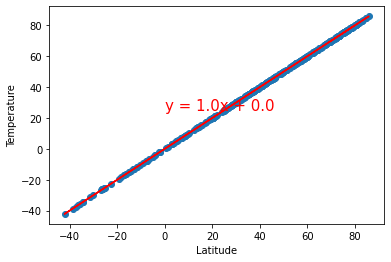

In [16]:
x_values = "Lat"
y_values = "Temperature"
text_coordinates = (0,25)
plot_linear_regression(northern_df[y_values],northern_df[y_values],y_values,text_coordinates,5)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 1.0


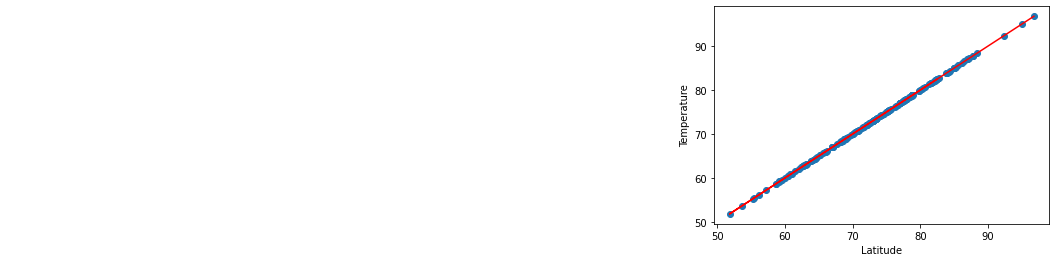

In [17]:
x_values = "Lat"
y_values = "Temperature"
text_coordinates = (-55,90)
plot_linear_regression(southern_df[y_values],southern_df[y_values],y_values,text_coordinates,6)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 1.0


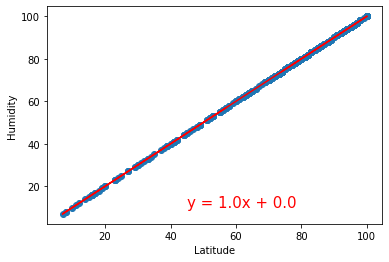

In [18]:
x_values = "Lat"
y_values = "Humidity"
text_coordinates = (45,10)
plot_linear_regression(northern_df[y_values],northern_df[y_values],y_values,text_coordinates,7)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 1.0


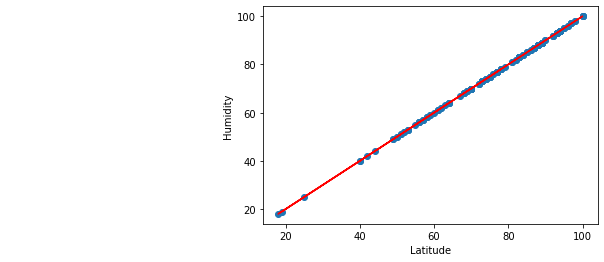

In [19]:
x_values = "Lat"
y_values = "Humidity"
text_coordinates = (-55,15)
plot_linear_regression(southern_df[y_values],southern_df[y_values],y_values,text_coordinates,8)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 1.0


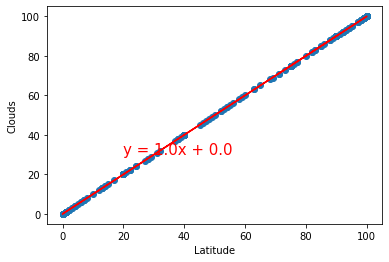

In [20]:
x_values = "Lat"
y_values = "Clouds"
text_coordinates = (20,30)
plot_linear_regression(northern_df[y_values],northern_df[y_values],y_values,text_coordinates,9)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 1.0


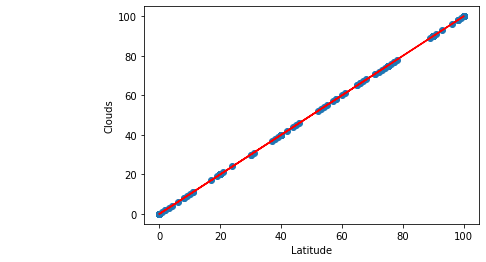

In [21]:
x_values = "Lat"
y_values = "Clouds"
text_coordinates = (-50,55)
plot_linear_regression(southern_df[y_values],southern_df[y_values],y_values,text_coordinates,10)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 1.0


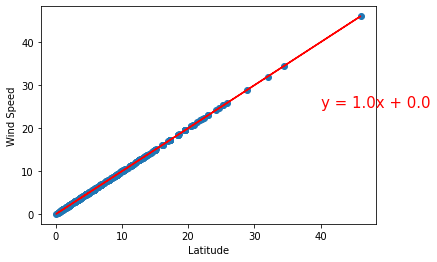

In [22]:
x_values = "Lat"
y_values = "Wind Speed"
text_coordinates = (40,25)
plot_linear_regression(northern_df[y_values],northern_df[y_values],y_values,text_coordinates,9)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 1.0


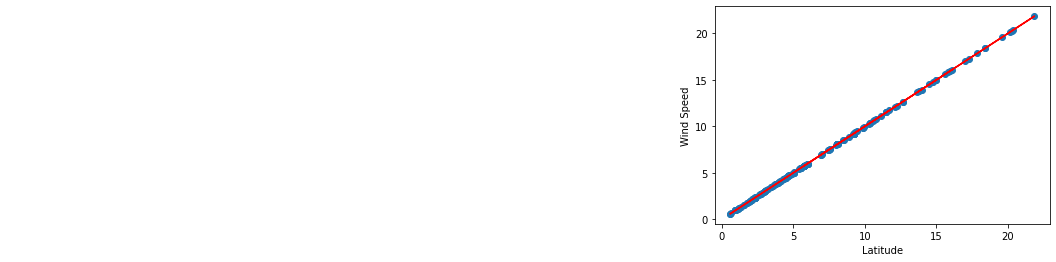

In [23]:
x_values = "Lat"
y_values = "Wind Speed"
text_coordinates = (-50, 20)
plot_linear_regression(southern_df[y_values],southern_df[y_values],y_values,text_coordinates,10)